In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import seaborn as sns

In [66]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [67]:
datas = pd.DataFrame(boston.data, columns = boston.feature_names)
datas['MEDV'] = boston.target

In [68]:
datas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 假設於波士頓買房的人們最在意的要素有以下五種
1.CRIM(犯罪率)
2.RM(房間總數)
3.AGE(房齡)
4.DIS(距離市中心的距離)
5.TAX(稅率)

In [69]:
ndata = datas[['CRIM','RM','AGE','DIS','TAX','MEDV']]

In [70]:
ndata.head()

,CRIM,RM,AGE,DIS,TAX,MEDV
0,0.00632,6.575,65.2,4.0900,296.0,24.0
1,0.02731,6.421,78.9,4.9671,242.0,21.6
2,0.02729,7.185,61.1,4.9671,242.0,34.7
3,0.03237,6.998,45.8,6.0622,222.0,33.4
4,0.06905,7.147,54.2,6.0622,222.0,36.2


In [71]:
X = ndata.loc[:, 'CRIM':'TAX'].values
Y = ndata.MEDV

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)  #分割

In [73]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
Y_predict = model.predict(X_test)

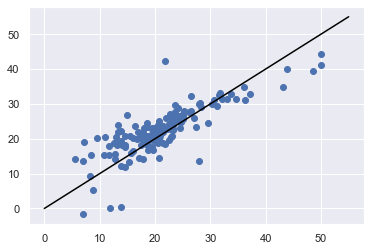

In [95]:
sns.set()
plt.scatter(Y_test, Y_predict);
plt.plot([0,55],[0,55],'black')

In [98]:
correlation_matrix = ndata.corr().round(2)

In [101]:
correlation_matrix

,CRIM,RM,AGE,DIS,TAX,MEDV
CRIM,1.00,-0.22,0.35,-0.38,0.58,-0.39
RM,-0.22,1.00,-0.24,0.21,-0.29,0.70
AGE,0.35,-0.24,1.00,-0.75,0.51,-0.38
DIS,-0.38,0.21,-0.75,1.00,-0.53,0.25
TAX,0.58,-0.29,0.51,-0.53,1.00,-0.47
MEDV,-0.39,0.70,-0.38,0.25,-0.47,1.00


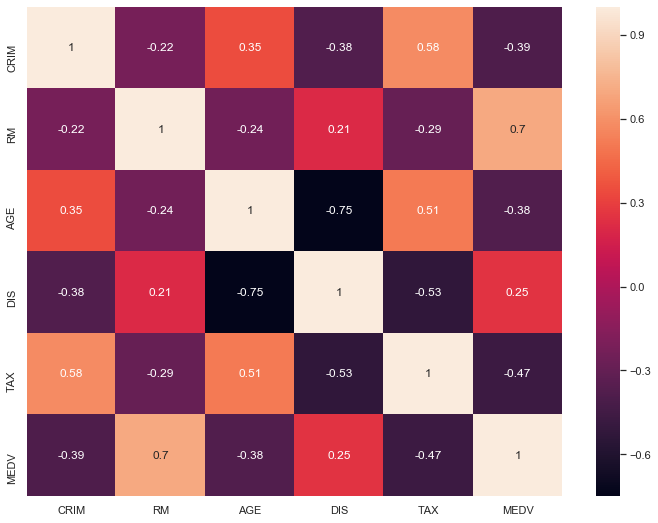

In [104]:
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(correlation_matrix, annot=True);